# Practical work 4: Frequency filtering, color

In [1]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)
    
def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(np.log(If+1)))


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

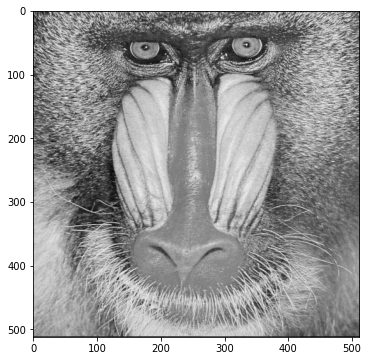

In [2]:
mandrill = np.array(Image.open('img/mandrill.png'))
imshow(mandrill)

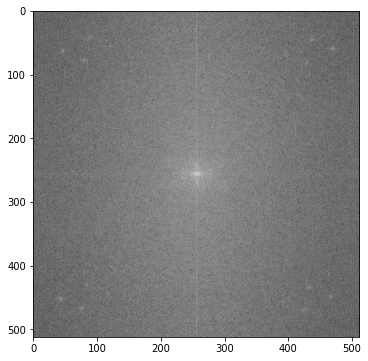

In [3]:
mandrill_comp = toVisualizeLogFT(computeFT(mandrill))
#print(computeFT(mandrill))
imshow(mandrill_comp)

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [4]:
def idealLowPassFilter(n,m,fc):
    filtre = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            #if np.sqrt((n/2-i)**2 + (m/2-j)**2) > fc:
            if np.sqrt((n/2-i)**2 + (m/2-j)**2) <= fc:
                filtre[i,j] = 1
    
    return filtre

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

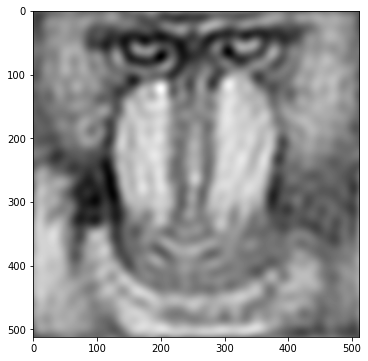

In [5]:
def lowPass(I, fc):
    comp = fftshift(fft2(I))
    n,m = comp.shape
    filtre = idealLowPassFilter(n,m,fc)
    comp = comp*filtre
    
    return ifft2(ifftshift(comp)).real

l_p = lowPass(mandrill,20)
imshow(l_p)

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


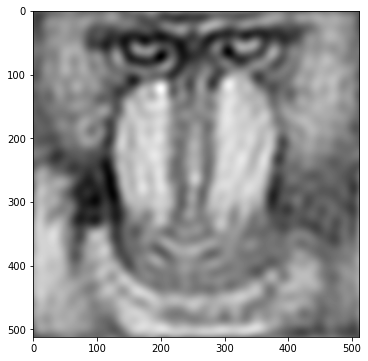

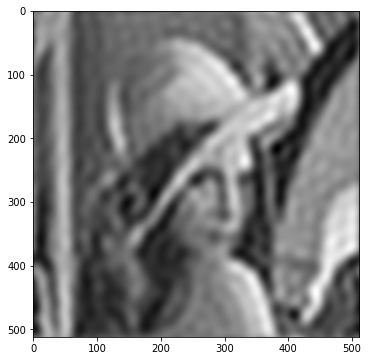

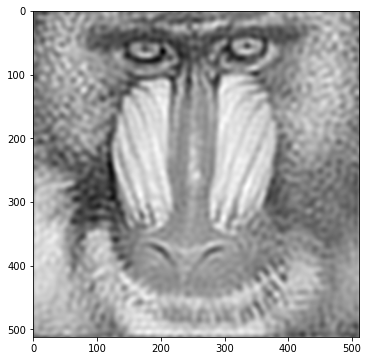

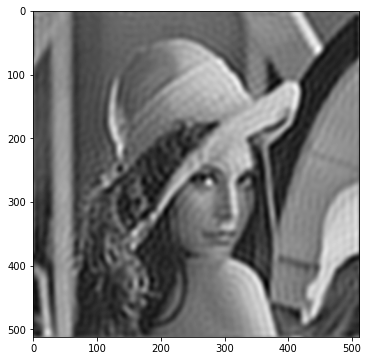

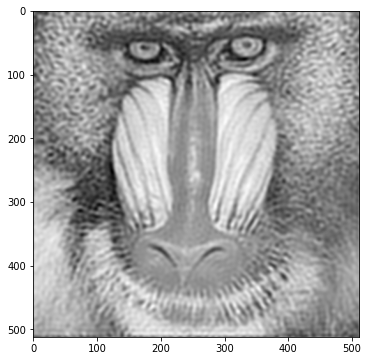

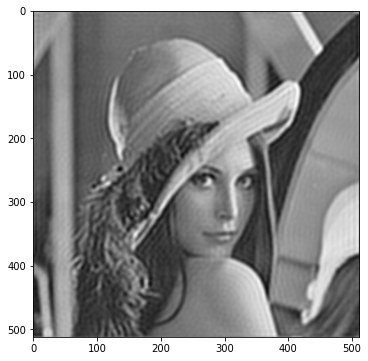

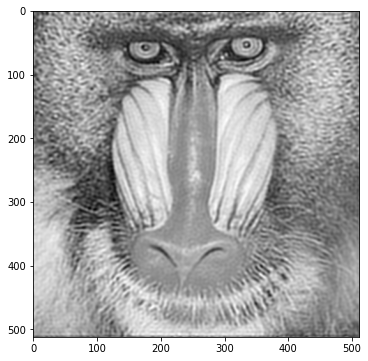

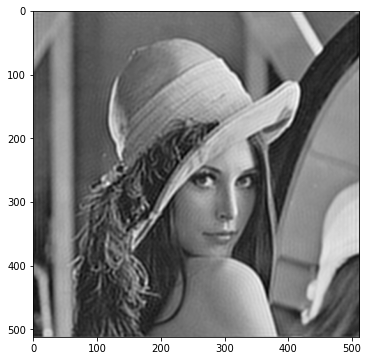

In [6]:
lena = np.array(Image.open('img/lena.jpg'))
for i in range(1,5):
    imshow(lowPass(mandrill,20*i))
    imshow(lowPass(lena,20*i))

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

(d-1)/2 lignes et colonnes de chaque côté de l'image


2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

In [7]:
def imagePad(I,h):
    n,m = np.shape(I)
    d = np.shape(h)[0]
    d1 = int((d-1)/2)
    im = np.zeros((n+d-1,m+d-1))
    im[d1:n+d1,d1:m+d1] = I
    return im

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [8]:
def conv2(I,h):
    I_pad = imagePad(I,h)
    I_conv = np.zeros(I.shape)
    d = np.shape(h)[0]
    d1 = (d-1)/2
    h2 = h[:,::-1]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            I_conv[i,j] = (I_pad[i:i+d,j:j+d]*h2).sum()
    return I_conv



In [9]:
h = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
I = np.array([[1,2,3],[4,5,6],[7,8,9]])

conv2(I,h)

array([[  7.,   4.,  -7.],
       [ 15.,   6., -15.],
       [ 13.,   4., -13.]])

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

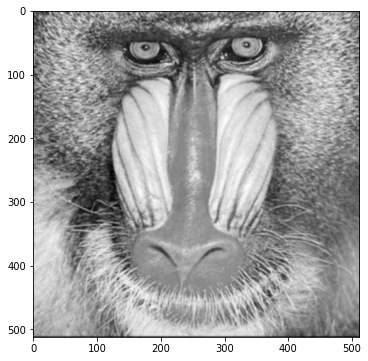

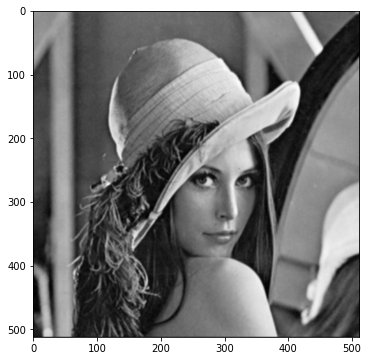

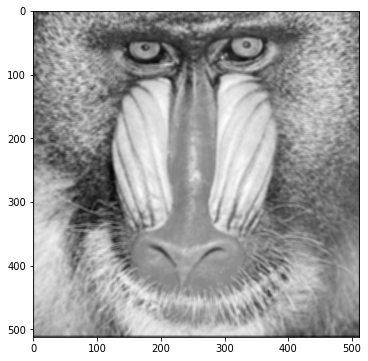

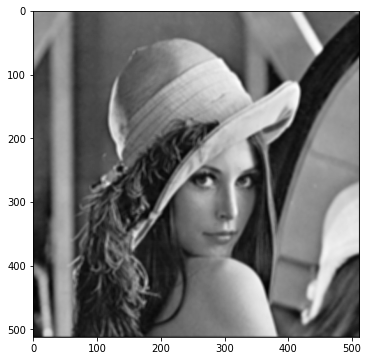

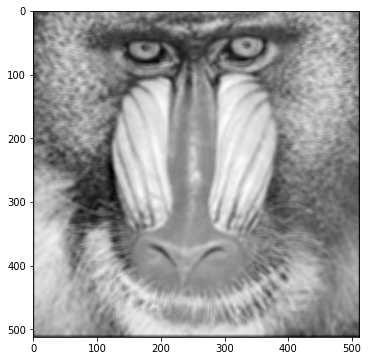

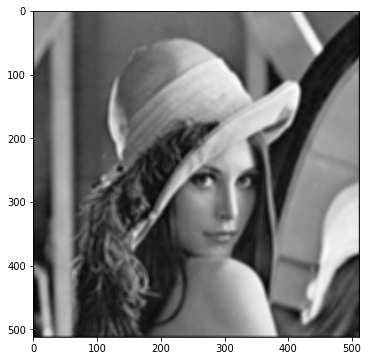

In [10]:
h1 = np.ones((3,3))
mandrill_conv_3 = conv2(mandrill,h1)
lena_conv_3 = conv2(lena,h1)
imshow(mandrill_conv_3)
imshow(lena_conv_3)

h2 = np.ones((5,5))
mandrill_conv_5 = conv2(mandrill,h2)
lena_conv_5 = conv2(lena,h2)
imshow(mandrill_conv_5)
imshow(lena_conv_5)


h3 = np.ones((7,7))
mandrill_conv_7 = conv2(mandrill,h3)
lena_conv_7 = conv2(lena,h3)
imshow(mandrill_conv_7)
imshow(lena_conv_7)

Plus la taille de la matrice augmente plus l'image se lisse.

--> lissage

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

fonction de transfert = transformée de Fourier du filtre paddé

H = TF(h)


TF(I*h) = TF(I)*H ( * convolution)

/var/folders/x7/bmqxr1zd3lxd_kcxxw9physr0000gn/T/ipykernel_18342/2844765721.py:23: RuntimeWarning: divide by zero encountered in log
  return np.abs(fftshift(np.log(If+1)))


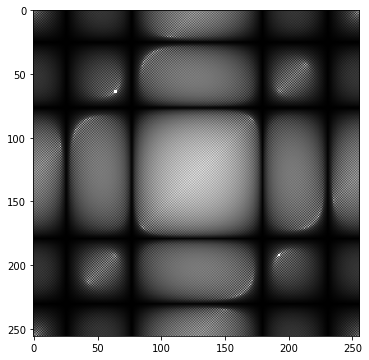

In [11]:
h=h2

d = len(h)
t = 256
t1,t2 = int((t-d)/2),int((t+d)/2)
h1 = np.zeros((t,t))
h1[t1:t2,t1:t2] = h
H = fft2(h1)
H.shape
imshow(toVisualizeLogFT(H))

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

In [12]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below


## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

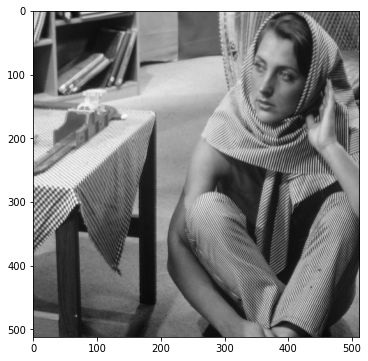

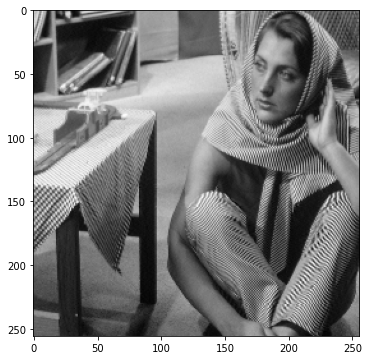

In [13]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]
barbara = np.array(Image.open('img/barbara.png'))
imshow(barbara)
imshow(subSample2(barbara))

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

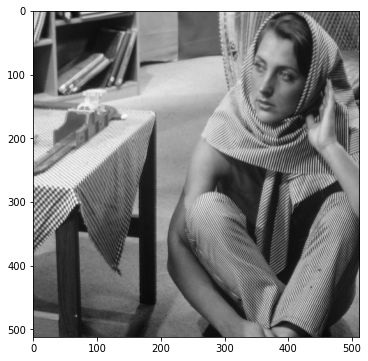

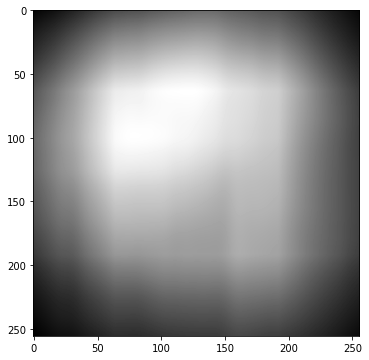

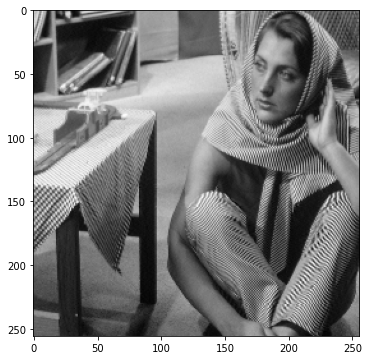

In [14]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A
### your answer start below
n,m = barbara.shape
fc = 20
barbara_lp = lowPass(barbara,fc)
h4 = antiAliasingFilter(n,m)
barbara_fil = conv2(barbara_lp,h4)

barbara_fil_sub2 = subSample2(barbara_fil)
barbara_sub2 = subSample2(barbara)

imshow(barbara)
imshow(barbara_fil_sub2)
imshow(barbara_sub2)


3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

Les contours sont plus lisses. Les contours ne sont pas dégradés.

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

(512, 512, 3) (512, 512)


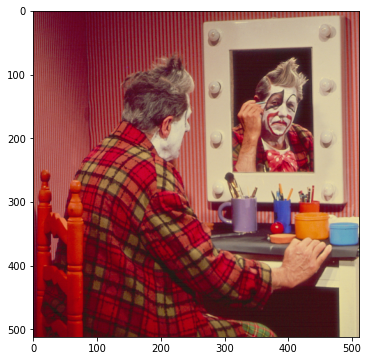

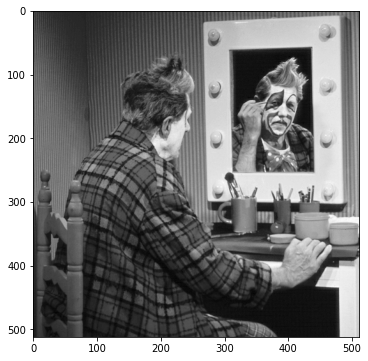

In [15]:
I1 = np.array(Image.open('img/clown.bmp'))
I2 = np.array(Image.open('img/clown_lumi.bmp'))
print(I1.shape,I2.shape)
imshow(I1/255)
imshow(I2)

La premiere image contient trois valeurs par pixel. C'est une image en couleur. Les trois valeurs représentent le niveau de rouge, vert et bleu d'un pixel.

La deuxième image est en monocouleur avec un niveau de gris.

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

Chacune des des trois dimensions représente un niveau de couleur. Ir pour le niveau de rouge, Ig pour le vert et Ib pour le bleu.

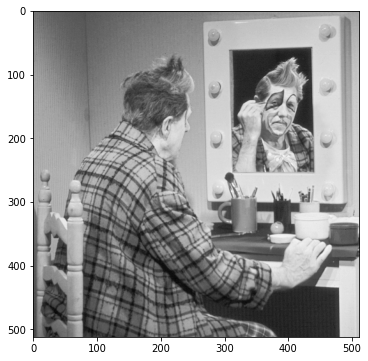

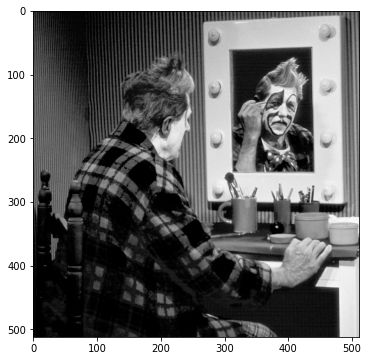

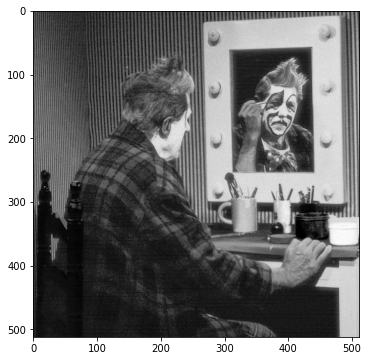

In [16]:
IR,IG,IB = I1[:,:,0],I1[:,:,1],I1[:,:,2]
imshow(IR)
imshow(IG)
imshow(IB)

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

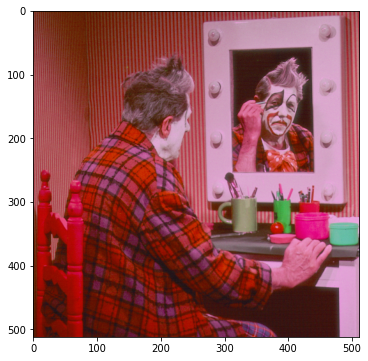

In [17]:
I3 = np.array([[np.array([IR[i,j],IB[i,j],IG[i,j]]) for j in range(I1.shape[1])]
               for i in range(I1.shape[0])])
imshow(I3/255)
# I3.shape

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

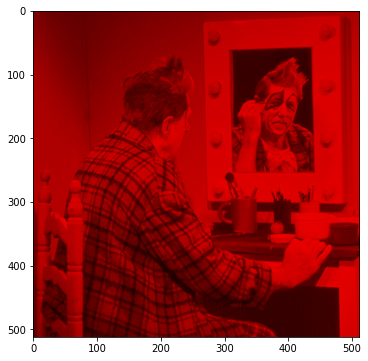

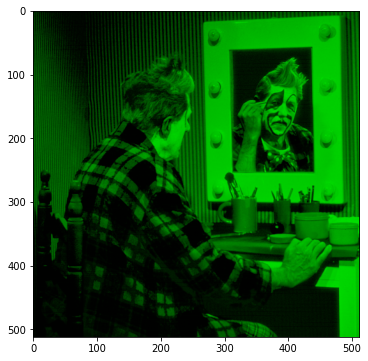

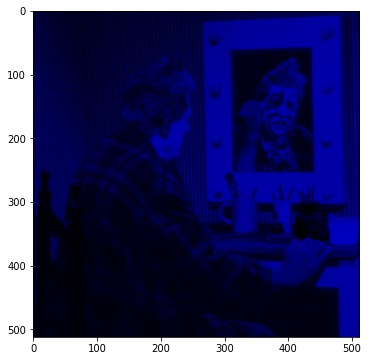

In [18]:
def red_green_blue(I):
  IR = np.array([[np.array([I[i,j,0],0,0]) for j in range(I1.shape[1])]
               for i in range(I1.shape[0])])
  
  IG = np.array([[np.array([0,I[i,j,1],0]) for j in range(I1.shape[1])]
               for i in range(I1.shape[0])])
  
  IB = np.array([[np.array([0,0,I[i,j,2]]) for j in range(I1.shape[1])]
               for i in range(I1.shape[0])])
  
  return IR,IG,IB

IR,IG,IB = red_green_blue(I1)
imshow(IR/255)
imshow(IG/255)
imshow(IB/255)